#                              Microsoft Breaks into the Movie Industry

### Overview

Throughout the years, the movie industry has become more and more popular. It is no doubt that the movie industry is one of the most competitve and richest industries out there. You're always hearing of all these new film releases coming out in theatres making the box office hot in revenue. With all of this popularity in the industry, of course it would be a good investment for Microsoft to hop on the trend.

### Business Problem 

It is tempting for companies to want to join the Movie Industry, especially if they are already successful in other areas, such as Microsoft's success in technology. Expanding their success can make their net worth even higher and reach different levels of new records for their company. However, it can be extremely difficult to become a successful movie company or create a new movie studio. With several industries already being way ahead of the game in the box office, such as Universal Pictures, Warner Bros, Walt Disney Pictures etc, it will be hard to play catch up. Therefore; some data analysis has been made in different areas of the movie industry. The data was broken down to see what kind of films are doing the best at the box office and have the best ROI. These findings are actionable insights that the head of Microsoft's new movie studio can use to help him decide what kind of film/s to create. 

## Data Preparation

When I started digging into the data files, of course my goal was to find what kind of movies where the most successful in terms of profit. I looked into genres, ROI (return of investment), directors, ratings, gross numbers and some other factors. At the end of my data analysis, I came up with three concrete business recommendations that will help this new idea perform its best. 

The first step I took into this project was start opening and reading the files that were given to us. After reading through them and cleaning them up, I only worked with the ones that helped support my ideas. I decided to merge certain data frames together and move on from there. The first files I worked with were the movie_basics sql file and movie_ratings sql file. 

In [1]:
import pandas as pd

In [2]:
! unzip -n zippedData/im.db.zip
import sqlite3
conn = sqlite3.connect("im.db")

Archive:  zippedData/im.db.zip


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
movie_ratings = pd.read_sql('SELECT * FROM movie_ratings', conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


After importing the files, I moved straight to cleaning up the genre column in movie_basics and merging the dataframes together. These two dataframes have a common column ("movie_id"), so it will be easy to merge them together. 

In [6]:
movie_basics['genre_list'] = movie_basics['genres'].str.split(',')

In [7]:
df_explode = movie_basics.explode('genre_list')

In [8]:
movie_basics.explode('genre_list').head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Drama


In [9]:
movie_basics2 = movie_basics.explode('genre_list')

In [10]:
movie_ratings2 = pd.merge(movie_ratings, movie_basics2)
movie_ratings2.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",Action
4,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",Adventure


I now have a new dataframe "movie_ratings2." To this dataframe, I am going to add the dataframe bom_movie_gross(CSV). I am combining these two dataframes based on movie title.

In [11]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
movie_ratings3 = pd.merge(movie_ratings2, bom_movie_gross, left_on='original_title', right_on='title')
movie_ratings3.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",Action,The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",Adventure,The Legend of Hercules,LG/S,18800000.0,42400000,2014
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",Fantasy,The Legend of Hercules,LG/S,18800000.0,42400000,2014
3,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Comedy,Baggage Claim,FoxS,21600000.0,887000,2013
4,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Biography,Moneyball,Sony,75600000.0,34600000,2011


Now, the last dataframe I used was the CSV file rt_movie_info. This dataframe I used by itself, I did not merge it with any other file. Only thing I did with this file was remove all of the NaN information and changed the "box_office" column from an object to an int.

In [13]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
clean_rt = rt_movie_info.dropna()
clean_rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [15]:
clean_rt['box_office'] = clean_rt['box_office'].str.replace(',','').astype(int)

/tmp/ipykernel_89/1569546586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rt['box_office'] = clean_rt['box_office'].str.replace(',','').astype(int)


In [16]:
clean_rt.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office       int64
runtime         object
studio          object
dtype: object

## Movie Data Analysis

### Business Recommendation

My first recommendation for this movie, is to pick the genre that is going to bring in the most profit. What movie genre is the most popular? What movie genre has the highest profit?

You can see in the dataframe below that most movies have 1-3 genres listed for them. This means that a movie doesn't necessarily have to have just one genre. One genre is usually the most specific one, such as comedy, action or horror, and then you'll have more specific genres like fantasy and sport that add to the movie information. 

In [60]:
movie_ratings3.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,title,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",Action,The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",Adventure,The Legend of Hercules,LG/S,18800000.0,42400000,2014
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",Fantasy,The Legend of Hercules,LG/S,18800000.0,42400000,2014
3,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,Comedy,Baggage Claim,FoxS,21600000.0,887000,2013
4,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Biography,Moneyball,Sony,75600000.0,34600000,2011


Here we have the exact value count for each genre in the dataframe. 

In [44]:
movie_ratings3['genre_list'].value_counts()

Drama          1354
Comedy          791
Action          527
Adventure       381
Thriller        380
Romance         377
Crime           330
Biography       256
Horror          223
Documentary     206
Mystery         177
Fantasy         135
Sci-Fi          128
Animation       113
Family          105
History          99
Music            84
Sport            54
War              30
Western          18
Musical          15
News              4
Name: genre_list, dtype: int64

As it can be seen in the list above, drama, comedy, action and adventure are the most popular genres in movies. Just because  the "Family" genre is in the bottom 10 , it doesn't mean that it is not combined with another genre such as "Comedy" which is in the top five. In other words, just because a movie has 'Music' as one of their genres, doesn't mean that it is not a succesful movie. It can be concluded, that a movie can have high success if it has at least one of the top three genres in their movie description.

Below is a visualization of the genres and their exact value count. 

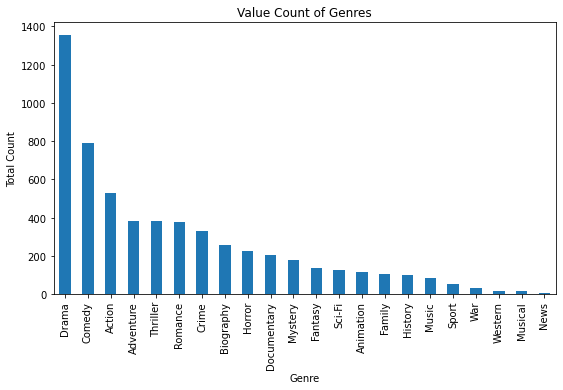

In [51]:
movie_ratings3['genre_list'].value_counts().plot(kind='bar', figsize = (9,5))
plt.title('Value Count of Genres')
plt.ylabel('Total Count')
plt.xlabel('Genre')
plt.show();

From these genres, I am going to see which ones have the highest domestic gross. 

In [61]:
movie_ratings3.groupby(['genre_list'],as_index = False)['domestic_gross'].sum()

,genre_list,domestic_gross
0,Action,3.542087e+10
1,Adventure,3.987759e+10
2,Animation,1.312476e+10
3,Biography,5.713317e+09
4,Comedy,3.106902e+10
5,Crime,8.804658e+09
6,Documentary,2.931434e+09
7,Drama,2.765404e+10
8,Family,5.441289e+09
9,Fantasy,7.964842e+09


In [53]:
genre_gross = movie_ratings3.groupby(['genre_list'],as_index = False)['domestic_gross'].sum()

The data series below shows the top 10 movie genres in terms of domestic gross. 

In [63]:
genre_gross.groupby(['genre_list'])['domestic_gross'].sum().sort_values(ascending=False)[:10]

genre_list
Adventure    3.987759e+10
Action       3.542087e+10
Comedy       3.106902e+10
Drama        2.765404e+10
Sci-Fi       1.389874e+10
Animation    1.312476e+10
Thriller     1.273012e+10
Crime        8.804658e+09
Fantasy      7.964842e+09
Horror       6.553255e+09
Name: domestic_gross, dtype: float64

In [64]:
genre_gross2 = genre_gross.groupby(['genre_list'])['domestic_gross'].sum().sort_values(ascending=False)[:10]

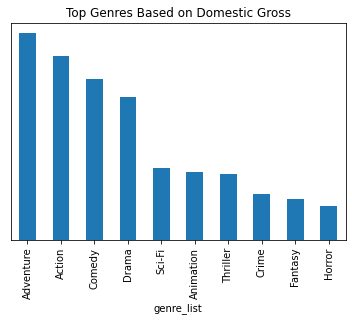

In [75]:
fig, ax = plt.subplots()
ax = genre_gross2.plot.bar()
ax.yaxis.set_visible(False)
ax.set_title('Top Genres Based on Domestic Gross');

The top four genres based of domestic gross are adventure, action, comedy and drama. Again, just because you decided to make an action movie, that does not mean that you can't combine it with one or two more genres. It is important, however, to have one "big" or "main" genre in mind to catch the attention of the viewers. Based off this analysis, my business recommendation would be to make the big idea of the new movie either "Adventure," "Action," or "Comedy."

### Business Recommendation 

For the second recomemendation, I decided to see if the rating of a movie affected the box office revenue. Many factors come into this in terms of who can go into the movie theatres and watch the movie.

In [18]:
clean_rt['rating'].value_counts()

R        105
PG-13     77
PG        38
NR         9
G          5
NC17       1
Name: rating, dtype: int64

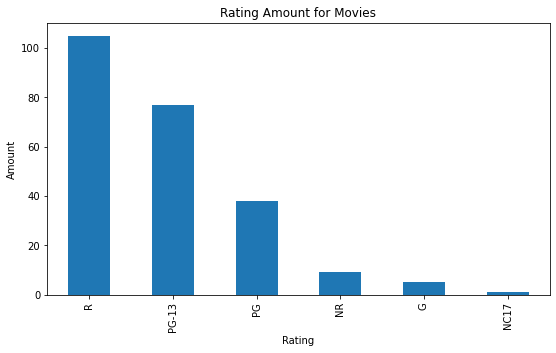

In [19]:
clean_rt['rating'].value_counts().plot(kind='bar', figsize = (9,5))
plt.title('Rating Amount for Movies')
plt.xlabel('Rating')
plt.ylabel('Amount');

Below, I created a data series that shows how much each rating made in the box_office in total.

In [20]:
clean_rt.groupby(['rating'],as_index = False)['box_office'].sum()

,rating,box_office
0,G,37013942
1,NC17,1260219
2,NR,5739231
3,PG,2009926506
4,PG-13,5291716108
5,R,2514567999


In [21]:
df = clean_rt.groupby(['rating'],as_index = False)['box_office'].sum()

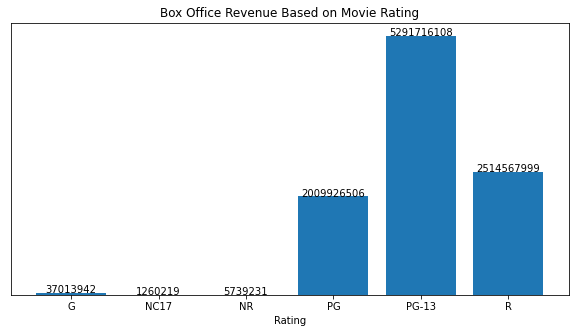

In [22]:
fig, ax = plt.subplots(figsize = (10,5))
Rating = df['rating']
Box_Office = df['box_office']
plt.bar(Rating, Box_Office)
plt.title('Box Office Revenue Based on Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Box Office Revenue')
for i in range(len(Rating)):
    plt.text(i,Box_Office[i],Box_Office[i], ha = 'center')
ax.yaxis.set_visible(False)
plt.show();

Ratings: 
- NR:Not Rated
- G:General Audiences
- PG:Parental Guidence Suggested for Children 
- NC17:No One 17 and Under Admitted
- PG-13:Parents Strongly Cautioned
- R: Restricted

By the bar graph above, we can see that the rating that made the most profit at the box office was PG-13. Movies tend to do better when they catch the attention of young adults/adults. When a movie is rated R, you have to be at least 18 years or older to walk into the movie theatre or be accompanied by an adult if you are underage. This creates a set back for people to go watch the movie. Movies that are rated G or PG are usually children movies. This means that most of the time they don't even make it to the movie theatre because the box office will know its not even going to be profitable. PG-13 movies are accessible to young adults/adults, making people go spend their money on the specific movie. People in the 13 and up range are also able to drive themselves to the cinema and pay for themselves. Therefore, the most beneficial rating for a new movie will be PG13.

### Business Recommendation

For my final recommendation, I would suggest that Microsoft partners with a succesful movie studio to help them create their movie. Partnering with a movie company that has years of experince can help Microsoft get an easy start in the industry. They can have a bigger team with great ideas that they can put together in a faster easier way. Later on, if Microsoft feels like they can be on their own, then they can step up to the next level and start their own independent company. 

In [33]:
movie_ratings3.groupby(['studio'], as_index = False)['domestic_gross'].sum()

,studio,domestic_gross
0,3D,6.100000e+06
1,A23,1.906000e+05
2,A24,6.536074e+08
3,ADC,7.244000e+05
4,AF,6.935000e+06
...,...,...
184,Wein.,3.680075e+09
185,XL,2.340000e+05
186,Yash,7.549720e+07
187,Zee,3.300000e+06


In [35]:
df2 = movie_ratings3.groupby(['studio'], as_index = False)['domestic_gross'].sum()

Here we have the top 10 movie studios with the highest domestic gross. 

In [38]:
df2.groupby(['studio'])['domestic_gross'].sum().sort_values(ascending=False)[:10]

studio
BV         4.200660e+10
Uni.       3.300054e+10
Fox        2.843220e+10
WB         2.824060e+10
Par.       1.904541e+10
Sony       1.850637e+10
LGF        1.042203e+10
WB (NL)    9.731500e+09
P/DW       4.884200e+09
LG/S       4.275700e+09
Name: domestic_gross, dtype: float64

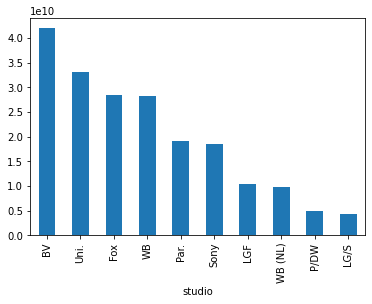

In [39]:
df2.groupby(['studio'])['domestic_gross'].sum().sort_values(ascending=False)[:10].plot(kind='bar');

In [42]:
df3 = df2.groupby(['studio'])['domestic_gross'].sum().sort_values(ascending=False)[:10]

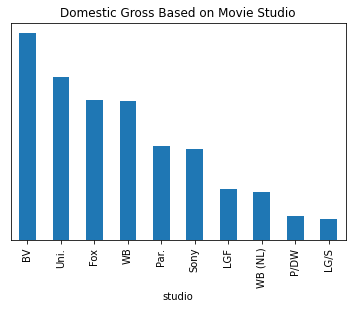

In [43]:
fig, ax = plt.subplots()

ax = df3.plot.bar()
ax.yaxis.set_visible(False)
ax.set_title('Domestic Gross Based on Movie Studio');

The graph above shows the domestic gross per movie studio. The reason why the data was only focused on domestic gross is because it is better to focus on getting started here in America, and start the growth of the movie here, and later on spread across the world. This graph only shows the top 10 profit makers. BV is way ahead of the game, for it has created some of the most popular movies in history. Followed by Universal Pictures and Fox. My advice would be to start with a company that is in the top middle of the graph, such as Warner Bros, Paramount Pictures or Sony. Trying to work with companies like Universal Pictures can be difficult, since you can run into many issues with them not wanting new ideas or any company (like Microsoft) to interfer with what they already have going on. On the other hand, the other studios that are in the mid range would be more open to new partners. 

## Conclusion

Final three concrete business recommendations clearly stated:

1) It would be the most beneficial that the genre for the first movie that Microsoft creates to be between adventure, action or comedy. These three movies had the highest domestic gross profit. These three genres are also in the top five most popular genres in terms of value counts in the data. Creating a movie with one of these genres as your rock and combining with one or two other genres can bring in quick popularity to the new movie.

2) The second business recommendation is that Microsoft creates a PG-13 movie. Even though the data showed that there are more rated R movies out there, PG-13 was the most profitable in the box office. PG-13 is the perfect rating for a movie because young adults and adults can watch these movies in theatres. Young adults/adults are more independent than kids. This means that you are targeting an audience that can easily give their money to the new movie. 

3) My last, but not least, recommendation for Microsoft is that they create their new movie with the help of an already existing movie studio. This way, they have people with experience help them in their new journey. As it was stated before, I suggest that Microsoft goes for a movie company that is in the middle range of the "Domestic Gross Based on Movie Studio" bar graph, so the company has a higher chance of being accepeted as a partners. The studios that could be partnered with are Warner Bros, Paramount Pictures or Sony.

Given these three points, I hope that the head of Microsoft's new movie company can find some use in my data analysis and is able to create a new succesful movie.  

In [76]:
conn.close()